# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


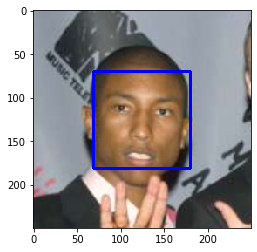

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
%matplotlib inline

In 99% of human images, it found a face
In 13% of dog images, it found a face


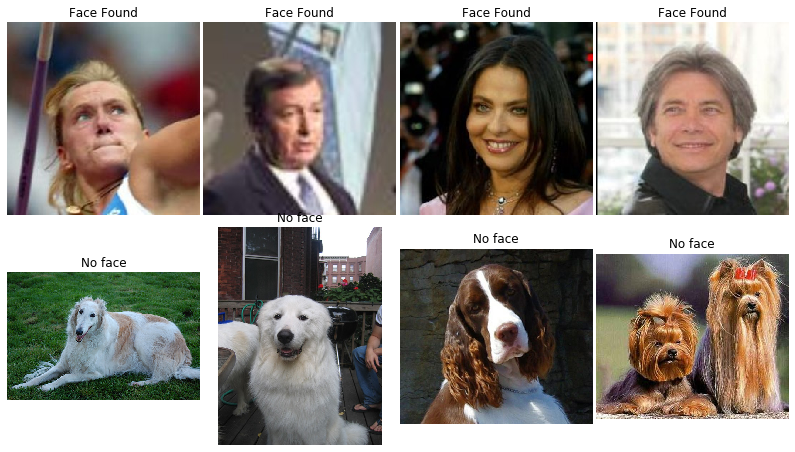

In [5]:
# from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

fig, ax = plt.subplots(2,4, figsize = (14,8))

for k, files in enumerate([human_files, dog_files]):
    count = 0
    for i in range(4):
        # Random selection
        j = np.random.randint(len(files))
        
        # Is there a face
        facelog = face_detector(files[j])
        
        count += 1*facelog
        # Plot the image and set the title accordingly
        img = cv2.imread(files[j])
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax[k,i].imshow(cv_rgb)
        if facelog:
            ax[k,i].set_title('Face Found')
        else:
            ax[k,i].set_title('No face')
        ax[k,i].set_axis_off()

fig.subplots_adjust(wspace=0.02, hspace=0)
        
for k, files in enumerate([human_files_short, dog_files_short]):
    count = 0
    for file in files:
        # Is there a face
        facelog = face_detector(file)
        count+= facelog*1
    
    if k == 0:
        print('In {}% of human images, it found a face'.format(int(count*100/len(human_files_short))))
    else:
        print('In {}% of dog images, it found a face'.format(int(count*100/len(dog_files_short))))

In [6]:
dog_files_test = np.array(glob("dogImages/test/*"))
dog_files_valid = np.array(glob("dogImages/valid/*/*"))
dog_files_train = np.array(glob("dogImages/train/*/*"))
print(len(dog_files_test),len(dog_files_valid),len(dog_files_train))

133 835 6680


In [7]:
ltotal = len(dog_files)
print(len(dog_files_test)/ltotal,len(dog_files_valid)/ltotal,len(dog_files_train)/ltotal)

0.01592623637887678 0.09998802538618129 0.7999042030894503


In [8]:
folders1 = []
folders2 = []
for file in dog_files:
    folders1.append(file.split('/')[1])
    folders2.append(file.split('/')[2])

f1 = set(folders1)
f2 = set(folders2)

numberfiles = np.zeros(len(f2))
for i, folder in enumerate(f2):
    files_train = np.array(glob("dogImages/train/"+folder+"/*"))
    numberfiles[i] = len(files_train)

50.225563909774436 11.81919971169211
132.Xoloitzcuintli 26.0
005.Alaskan_malamute 77.0


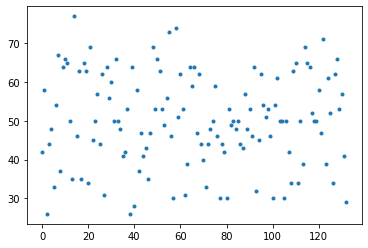

In [9]:
plt.plot(numberfiles,'.')
print(np.mean(numberfiles), np.std(numberfiles))
print(list(f2)[numberfiles.argmin()],numberfiles.min())
print(list(f2)[numberfiles.argmax()],numberfiles.max())

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [10]:
import torch
import torchvision.models as models
# check if CUDA is available
use_cuda = torch.cuda.is_available()


In [11]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)


# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

**Before writing function**, let us understand how to provide input data to the network, and what kind of output we receive. As usual the documentation is a bit confusing, but on the web there are some resources where they do go around small details for single image processing:
 - We first load the image with Pillow
 - Then we construct the transformation for preprocessing:
     + Resize image
     + Crop the central part
     + Transform it to a tensor
     + Normalize according to documentation
     + Unsquezze the array to copy it to the network
     + Move it to the cuda device
 - We put VGG16 in evaluation mode 
 - Then, we evaluate it and take it back to the cpu
 - Finally, we need to detach the tensor to forget about the derivatives and transform it into numpy
 - The largest value is the label

Class is: 225


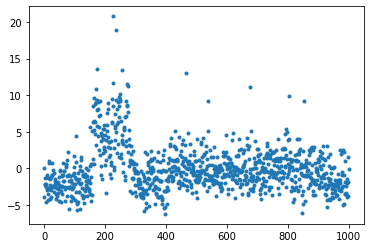

In [12]:
#https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
from PIL import Image
import torchvision.transforms as transforms

    
img = Image.open(dog_files[0])

normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225])

transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(), 
                                normalize])

imgtd = transform(img)
batch = torch.unsqueeze(imgtd, 0).cuda()
#torch.utils.data.DataLoader
VGG16.eval()

output = VGG16(batch).cpu()
outputnp = output.detach().numpy()
plt.plot(outputnp.flatten(),'.')

print('Class is:', outputnp.argmax())

Now, we are ready to write it

In [13]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [14]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)

    # Preprocessing
    # Defining function
    normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                    std = [0.229, 0.224, 0.225])
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(), 
                                    normalize])
    
    # Transforming
    imgtd = transform(img)
    batch = torch.unsqueeze(imgtd, 0).cuda()
    
    # Network evaluation
    VGG16.eval()

    output = VGG16(batch).cpu()
    outputnp = output.detach().numpy()

    return outputnp.argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [15]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    imgclass = VGG16_predict(img_path)
    isdog = False
    if imgclass>150 and imgclass<268:
        isdog = True
        
    return isdog # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [16]:
%%time
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

for k, files in enumerate([human_files_short, dog_files_short]):
    count = 0
    for file in files:
        # Is it a dog?
        isdog = dog_detector(file)
        count+= isdog*1
    
    if k == 0:
        print('It classified {}% of human images as dogs'.format(int(count*100/len(human_files_short))))
    else:
        print('It classified {}% of dogs images as dogs'.format(int(count*100/len(dog_files_short))))

It classified 0% of human images as dogs
It classified 99% of dogs images as dogs
CPU times: user 11.7 s, sys: 13.3 ms, total: 11.7 s
Wall time: 2.65 s


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [17]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [18]:
## Add small gaussian noise to pixel values
class GaussianNoise:
    '''This class is another augmentation method that just add 
    small Gaussian noise to the image. The scale of the noise is
    set by the parameter std. Note that if it is additive it should
    be behind normalization function, or it can produce negative 
    pixel values, no clipping for the time being.
    '''
    
    def __init__(self, std = 0.02, noisetype = 'additive'):
        self.std = std
        self.noisetype = noisetype
        if self.noisetype == 'additive':
            self.transform = lambda x: x + torch.randn(x.size())*std
        elif self.noisetype == 'multiplicative':
            self.transform = lambda x: x*(1.0+torch.randn(x.size())*std)
        else:
            print('Noise type not implemented, use either additive or multiplicative. Set to identity')
            self.transform = lambda x: x
            
    def __call__(self, x):
        return self.transform(x)
    
        

In [19]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

#Hyperparameters
batch_sizes = 8
max_angle = 20
color_r = (0., 0., 0., 0.0) #(0.5, 0.5, 0.001, 0.001)
max_noise = 0.0 #0.01
# Preprocessing
normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225])

data_transform = {'train': transforms.Compose([transforms.Resize(256),
                        transforms.RandomCrop(224),
                        transforms.RandomRotation(max_angle),
                        transforms.RandomVerticalFlip(),
                        transforms.RandomHorizontalFlip(),
                        transforms.ColorJitter(brightness=color_r[0], 
                                               contrast=color_r[1], 
                                               saturation=color_r[2], 
                                               hue=color_r[3]),
                        transforms.RandomPerspective(),
                        transforms.ToTensor(), 
                        normalize,
                        GaussianNoise(max_noise, noisetype='additive')
                        ]),
             'val': transforms.Compose([transforms.Resize(256),
                        transforms.CenterCrop(224),
                        transforms.ToTensor(), 
                        normalize,
                        ]),
             'test': transforms.Compose([transforms.Resize(256),
                        transforms.CenterCrop(224),
                        transforms.ToTensor(), 
                        normalize,
                        ]),
            }


#Datasets
train_data = datasets.ImageFolder('dogImages/train', 
                                  transform = data_transform['train'])
valid_data = datasets.ImageFolder('dogImages/valid', 
                                  transform = data_transform['val'])
test_data = datasets.ImageFolder('dogImages/test', 
                                  transform = data_transform['test'])



data_loaders = {'train': torch.utils.data.DataLoader(train_data,
                                           batch_size = batch_sizes,
                                           shuffle = True,
                                           num_workers = 1
                                            ),
                'valid':torch.utils.data.DataLoader(valid_data,
                                           batch_size = batch_sizes,
                                           shuffle = True,
                                           num_workers = 1
                                            ),
                'test':torch.utils.data.DataLoader(test_data,
                                           batch_size = batch_sizes,
                                           shuffle = True,
                                           num_workers = 1
                                            )
               }


In [20]:
class_names = train_data.classes

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

Text(0.5, 0.98, 'Examples of augmented images')

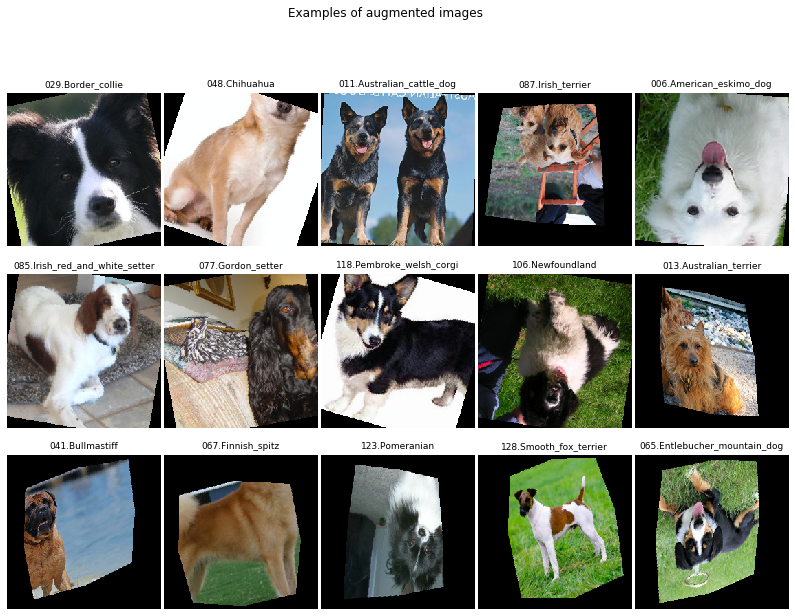

In [21]:
# https://stackoverflow.com/questions/55179282/display-examples-of-augmented-images-in-pytorch


def denormalise(img):
    # transform PIL image to a normal numpy array 
    img = img.numpy().squeeze().transpose(1, 2, 0)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = (img*std + mean).clip(0,1)
    return img

sampler = torch.utils.data.DataLoader(train_data,
                                    batch_size = 1,
                                    shuffle = True,
                                    )


fig, axs = plt.subplots(3, 5, figsize = (14,10) )
axs = axs.flatten()

for ax in axs:
    img, idx = next(iter(sampler))

    ax.imshow(denormalise(img))
    ax.set_axis_off()
    ax.set_title(class_names[idx], fontsize =9)
    
fig.subplots_adjust(wspace=0.02, hspace=0)
fig.suptitle('Examples of augmented images')

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [22]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture

def createblocklist(n0, n1, nf, kernels, nrep = 3, nblocks = 2, pool ='maxpool'):
    #     n0, n1 = 0, 2
    modlist = [nn.Conv2d(nf[n0],nf[n1]
                  ,kernels[n1], padding = kernels[n1]//2),
        nn.ReLU()]
    
    for i in range(nrep):
        modlist.extend([nn.Conv2d(nf[n1],nf[n1]
                       ,kernels[n1], padding = kernels[n1]//2),
            nn.ReLU()]
        )
        
    if nblocks>1:
        for j in range(nblocks-1):
            modlist.extend([nn.Conv2d(nf[n1],nf[n0]
                           ,kernels[n1], padding = kernels[n1]//2),
                nn.ReLU()]
            )
            modlist.extend([nn.Conv2d(nf[n0],nf[n1]
                           ,kernels[n1], padding = kernels[n1]//2),
                nn.ReLU()]
            )
            
            for i in range(nrep):
                modlist.extend([nn.Conv2d(nf[n1],nf[n1]
                               ,kernels[n1], padding = kernels[n1]//2),
                    nn.ReLU()]
                )
            

    n1 += 1
    if pool =='maxpool':
        modlist.append(nn.MaxPool2d(kernels[n1],
                        stride = nf[n1], padding = kernels[n1]//2)
        )
    else:
        modlist.append(nn.AvgPool2d(kernels[n1],
                        stride = nf[n1])
        )
        
    return modlist
    
class Net(nn.Module):
    ''' Add intermediate layers with hyperparameters 
    as filters and all those things, it will finish with a dense layer
    or maybe relu
    '''
    ### TODO: choose an architecture, and complete the class
    def __init__(self, nf = [32,0,32], kernels = [5,5,5], 
                 intrablock1repetition = [3,3,3],
                 intrablock2repetition = [3,3,3]):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.layerdict = {'Conv': nn.Conv2d,
                          'Linear': nn.Linear,
                          'ReLU'  : nn.ReLU,
                          'maxpool': nn.MaxPool2d,
                          'avgpool': nn.AvgPool2d            
        }
        
        self.output_size = len(class_names)
        self.nf = nf
        self.kernels = kernels
        
        self.convlayers = nn.ModuleList([])
        
        n1 = 0
        
        modlist = [nn.Conv2d(3,nf[n1]
                      ,kernels[n1], padding = kernels[n1]//2),
            nn.ReLU()]
        for i in range(0):
            modlist.extend([nn.Conv2d(nf[n1],nf[n1]
                           ,kernels[n1], padding = kernels[n1]//2),
                nn.ReLU()]
            )
        n1 += 1
        modlist.append(nn.MaxPool2d(kernels[n1],
                        stride = nf[n1], padding = kernels[n1]//2)
        )
        
        self.convblock0 = nn.Sequential(*modlist)
        
        n0, n1 = 0, 2
        
        modlist = createblocklist(n0, n1, nf, kernels, 
                                  nrep = 0, nblocks = 1)
        
        self.convblock1 = nn.Sequential(*modlist) 
        
        n0, n1 = 2, 4
        
        modlist = createblocklist(n0, n1, nf, kernels, 
                                  nrep = 0, nblocks = 1)
        
        self.convblock2 = nn.Sequential(*modlist) 
        
        n0, n1 = 4, 6
        modlist = createblocklist(n0, n1, nf, kernels, 
                                  nrep = 0, nblocks = 1, pool = 'avgpool')
        
        self.convblock3 = nn.Sequential(*modlist) 

        
        sp_dim = 4 # int(224/2**4)
        nfF = nf[6]
        self.newdim = sp_dim*sp_dim*nfF
        
        self.linear1 = nn.Linear(self.newdim,500)
        self.linear2 = nn.Linear(500,self.output_size)
        
        self.dropout = nn.Dropout(0.4)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.convblock0(x)
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        
        shape = torch.prod(torch.tensor(x.shape[1:])).item()
        x = x.view(-1, shape)
        
        x = self.dropout(x)
        x = self.linear1(x)
        x = nn.ReLU()(x)
        x = self.linear2(x)
        
        return x
    
    
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net(nf = [32,2,64,2,64,2,128,5], kernels = [5,5,5,5,5,5,5,9])

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [23]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture

def createblocklist(n0, n1, nf, kernels, nrep = 3, nblocks = 2, pool ='maxpool'):
    #     n0, n1 = 0, 2
    modlist = [nn.Conv2d(nf[n0],nf[n1]
                  ,kernels[n1], padding = kernels[n1]//2),
        nn.ReLU()]
    
    for i in range(nrep):
        modlist.extend([nn.Conv2d(nf[n1],nf[n1]
                       ,kernels[n1], padding = kernels[n1]//2),
            nn.ReLU()]
        )
        
    if nblocks>1:
        for j in range(nblocks-1):
            modlist.extend([nn.Conv2d(nf[n1],nf[n0]
                           ,kernels[n1], padding = kernels[n1]//2),
                nn.ReLU()]
            )
            modlist.extend([nn.Conv2d(nf[n0],nf[n1]
                           ,kernels[n1], padding = kernels[n1]//2),
                nn.ReLU()]
            )
            
            for i in range(nrep):
                modlist.extend([nn.Conv2d(nf[n1],nf[n1]
                               ,kernels[n1], padding = kernels[n1]//2),
                    nn.ReLU()]
                )
            

    n1 += 1
    if pool =='maxpool':
        modlist.append(nn.MaxPool2d(kernels[n1],
                        stride = nf[n1], padding = kernels[n1]//2)
        )
    else:
        modlist.append(nn.AvgPool2d(kernels[n1],
                        stride = nf[n1])
        )
        
    return modlist
    
class Net(nn.Module):
    ''' Add intermediate layers with hyperparameters 
    as filters and all those things, it will finish with a dense layer
    or maybe relu
    '''
    ### TODO: choose an architecture, and complete the class
    def __init__(self, nf = [32,0,32], kernels = [5,5,5], 
                 intrablock1repetition = [3,3,3],
                 intrablock2repetition = [3,3,3]):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.layerdict = {'Conv': nn.Conv2d,
                          'Linear': nn.Linear,
                          'ReLU'  : nn.ReLU,
                          'maxpool': nn.MaxPool2d,
                          'avgpool': nn.AvgPool2d            
        }
        
        self.output_size = len(class_names)
        self.nf = nf
        self.kernels = kernels
        
        self.convlayers = nn.ModuleList([])
        
        n1 = 0
        
        modlist = [nn.Conv2d(3,nf[n1]
                      ,kernels[n1], padding = kernels[n1]//2),
            nn.ReLU()]
        for i in range(0):
            modlist.extend([nn.Conv2d(nf[n1],nf[n1]
                           ,kernels[n1], padding = kernels[n1]//2),
                nn.ReLU()]
            )
        n1 += 1
        modlist.append(nn.MaxPool2d(kernels[n1],
                        stride = nf[n1], padding = kernels[n1]//2)
        )
        
        self.convblock0 = nn.Sequential(*modlist)
        
        n0, n1 = 0, 2
        
        modlist = createblocklist(n0, n1, nf, kernels, 
                                  nrep = 0, nblocks = 1)
        
        self.convblock1 = nn.Sequential(*modlist) 
        
        n0, n1 = 2, 4
        
        modlist = createblocklist(n0, n1, nf, kernels, 
                                  nrep = 0, nblocks = 1)
        
        self.convblock2 = nn.Sequential(*modlist) 
        
        n0, n1 = 4, 6
        modlist = createblocklist(n0, n1, nf, kernels, 
                                  nrep = 0, nblocks = 1, pool = 'avgpool')
        
        self.convblock3 = nn.Sequential(*modlist) 

        
        sp_dim = 2 # int(224/2**4)
        nfF = nf[6]
        self.newdim = sp_dim*sp_dim*nfF
        
        self.linear1 = nn.Linear(self.newdim,500)
        self.linear2 = nn.Linear(500,self.output_size)
        
        self.dropout = nn.Dropout(0.4)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        ## Define forward behavior
        x = self.convblock0(x)
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        
        shape = torch.prod(torch.tensor(x.shape[1:])).item()
        x = x.view(-1, shape)
        
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        
        # x = nn.Softmax(dim = 1)(x)
        
        return x
    
    
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net(nf = [32,2,64,2,128,2,128,14], kernels = [5,5,5,5,5,5,5,14])

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [24]:
from torchsummary import summary

summary(model_scratch, input_size = (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]           2,432
              ReLU-2         [-1, 32, 224, 224]               0
         MaxPool2d-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]          51,264
              ReLU-5         [-1, 64, 112, 112]               0
         MaxPool2d-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]         204,928
              ReLU-8          [-1, 128, 56, 56]               0
         MaxPool2d-9          [-1, 128, 28, 28]               0
           Conv2d-10          [-1, 128, 28, 28]         409,728
             ReLU-11          [-1, 128, 28, 28]               0
        AvgPool2d-12            [-1, 128, 2, 2]               0
          Dropout-13                  [-1, 512]               0
           Linear-14                  [

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [25]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = .5e-2, momentum = 0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [59]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

loaders_scratch = data_loaders

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        train_acc = 0.0
        valid_acc = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # Computing the loss          
            
            yhat = model(data)
            loss = criterion(yhat, target)
                       
            # Compute the gradients
            loss.backward()
            
            # Update parameters and gradients to zero
            optimizer.step()
            optimizer.zero_grad()
            
            train_loss +=((1/(batch_idx + 1)) * (loss.data - train_loss))
            
            _, maxidcs = torch.max(yhat,1)
            train_acc += (1/(batch_idx + 1))*(-train_acc+
                 (maxidcs == target).sum().data.cpu().numpy()/maxidcs.size()[0])

            del data
            del target
            
        ######################    
        # validate the model #
        ######################
        model.eval()

        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss

            yhat = model(data)
            loss = criterion(yhat, target)
            valid_loss += ((1/(batch_idx + 1))*(loss.data - valid_loss))

            _, maxidcs = torch.max(yhat,1)
            valid_acc += (1/(batch_idx + 1))*(-valid_acc+
                 (maxidcs == target).sum().data.cpu().numpy()/maxidcs.size()[0])

            del data
            del target
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.3f}, acc:{:.3f} \tValidation Loss: {:.6f}, acc:{:.3f}'.format(
            epoch, 
            train_loss,
            train_acc,
            valid_loss,
            valid_acc
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(),save_path)
    # return trained model
    return model

In [28]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

In [25]:
# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.656472 	Validation Loss: 4.574130
Epoch: 2 	Training Loss: 4.484364 	Validation Loss: 4.431760
Epoch: 3 	Training Loss: 4.321619 	Validation Loss: 4.222309
Epoch: 4 	Training Loss: 4.207127 	Validation Loss: 4.193263
Epoch: 5 	Training Loss: 4.192065 	Validation Loss: 4.107595
Epoch: 6 	Training Loss: 4.132681 	Validation Loss: 4.268332
Epoch: 7 	Training Loss: 4.137611 	Validation Loss: 4.123872
Epoch: 8 	Training Loss: 4.099572 	Validation Loss: 4.131931
Epoch: 9 	Training Loss: 4.092736 	Validation Loss: 4.123960
Epoch: 10 	Training Loss: 4.103441 	Validation Loss: 4.124364


<All keys matched successfully>

In [29]:
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = .5e-3, momentum = 0.9)

In [30]:
%%time
model_scratch = train(5, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 3.409425 	Validation Loss: 3.887712
Epoch: 2 	Training Loss: 3.356551 	Validation Loss: 3.896133
Epoch: 3 	Training Loss: 3.340132 	Validation Loss: 3.912396
Epoch: 4 	Training Loss: 3.336193 	Validation Loss: 3.882212
Epoch: 5 	Training Loss: 3.335669 	Validation Loss: 3.883369
CPU times: user 18.2 s, sys: 4.22 s, total: 22.5 s
Wall time: 6min 1s


In [35]:
%%time
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


RuntimeError: CUDA error: unspecified launch failure

Traceback (most recent call last):
  File "/home/pablo/.pyenv/versions/3.6.10/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/pablo/.pyenv/versions/3.6.10/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/pablo/.pyenv/versions/3.6.10/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/pablo/.pyenv/versions/3.6.10/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [31]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

In [32]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.873944


Test Accuracy: 14% (121/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [40]:
## TODO: Specify data loaders
batch_sizes = 8
max_angle = 30
color_r = (0.2, 0.2, 0.001, 0.001)
max_noise = 0.05
path = 'dogImages/'
# Preprocessing
normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225])

data_transform = {'train': transforms.Compose([transforms.Resize(256),
                        transforms.RandomCrop(224),
                        transforms.RandomRotation(max_angle),
                        transforms.RandomVerticalFlip(),
                        transforms.RandomHorizontalFlip(),
                        transforms.ColorJitter(brightness=color_r[0], 
                                               contrast=color_r[1], 
                                               saturation=color_r[2], 
                                               hue=color_r[3]),
                        transforms.ToTensor(), 
                        normalize,
                        GaussianNoise(max_noise, noisetype='additive')
                        ]),
             'val': transforms.Compose([transforms.Resize(256),
                        transforms.CenterCrop(224),
                        transforms.ToTensor(), 
                        normalize,
                        ]),
             'test': transforms.Compose([transforms.Resize(256),
                        transforms.CenterCrop(224),
                        transforms.ToTensor(), 
                        normalize,
                        ]),
            }


#Datasets
train_data = datasets.ImageFolder(path+'train', 
                                  transform = data_transform['train'])
valid_data = datasets.ImageFolder(path+'valid', 
                                  transform = data_transform['val'])
test_data = datasets.ImageFolder(path+'test', 
                                  transform = data_transform['test'])



loaders_transfer = {'train': torch.utils.data.DataLoader(train_data,
                                           batch_size = batch_sizes,
                                           shuffle = True,
                                           num_workers = 1
                                            ),
                'valid':torch.utils.data.DataLoader(valid_data,
                                           batch_size = batch_sizes,
                                           shuffle = True,
                                           num_workers = 1
                                            ),
                'test':torch.utils.data.DataLoader(test_data,
                                           batch_size = batch_sizes,
                                           shuffle = True,
                                           num_workers = 1
                                            )
               }

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [48]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.mobilenet_v2(pretrained=True)

num_classes = len(class_names)
nft = model_transfer.last_channel
model_transfer.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(nft, num_classes),
        )


if use_cuda:
    model_transfer = model_transfer.cuda()

In [ ]:
model_transfer.

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [49]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters(), lr = 1e-3)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [60]:
# train the model
n_epochs = 10
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 3.328, acc:0.161 	Validation Loss: 2.877975, acc:0.222
Epoch: 2 	Training Loss: 3.277, acc:0.169 	Validation Loss: 2.865016, acc:0.230
Epoch: 3 	Training Loss: 3.224, acc:0.177 	Validation Loss: 3.062237, acc:0.223
Epoch: 4 	Training Loss: 3.153, acc:0.196 	Validation Loss: 2.769486, acc:0.250
Epoch: 5 	Training Loss: 3.066, acc:0.213 	Validation Loss: 2.603333, acc:0.308
Epoch: 6 	Training Loss: 2.971, acc:0.233 	Validation Loss: 2.617466, acc:0.298
Epoch: 7 	Training Loss: 2.833, acc:0.255 	Validation Loss: 2.308269, acc:0.344
Epoch: 8 	Training Loss: 2.686, acc:0.283 	Validation Loss: 2.226388, acc:0.401
Epoch: 9 	Training Loss: 2.644, acc:0.297 	Validation Loss: 2.279058, acc:0.361
Epoch: 10 	Training Loss: 2.538, acc:0.306 	Validation Loss: 2.201912, acc:0.418


In [61]:
n_epochs = 20
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 2.511, acc:0.328 	Validation Loss: 2.214887, acc:0.375
Epoch: 2 	Training Loss: 2.392, acc:0.348 	Validation Loss: 1.977128, acc:0.439
Epoch: 3 	Training Loss: 2.320, acc:0.358 	Validation Loss: 2.010478, acc:0.425
Epoch: 4 	Training Loss: 2.241, acc:0.382 	Validation Loss: 1.812355, acc:0.484
Epoch: 5 	Training Loss: 2.170, acc:0.396 	Validation Loss: 1.699111, acc:0.517
Epoch: 6 	Training Loss: 2.060, acc:0.434 	Validation Loss: 1.737986, acc:0.498
Epoch: 7 	Training Loss: 2.022, acc:0.424 	Validation Loss: 1.770748, acc:0.506
Epoch: 8 	Training Loss: 1.968, acc:0.444 	Validation Loss: 1.585641, acc:0.553
Epoch: 9 	Training Loss: 1.935, acc:0.456 	Validation Loss: 1.614457, acc:0.545
Epoch: 10 	Training Loss: 1.943, acc:0.456 	Validation Loss: 1.640280, acc:0.515
Epoch: 11 	Training Loss: 1.877, acc:0.472 	Validation Loss: 1.737736, acc:0.503
Epoch: 12 	Training Loss: 1.867, acc:0.468 	Validation Loss: 1.688129, acc:0.544
Epoch: 13 	Training Loss: 1.812, acc:

In [62]:
n_epochs = 20
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 1.517, acc:0.557 	Validation Loss: 1.399182, acc:0.594
Epoch: 2 	Training Loss: 1.522, acc:0.556 	Validation Loss: 1.340911, acc:0.600
Epoch: 3 	Training Loss: 1.512, acc:0.562 	Validation Loss: 1.322531, acc:0.631
Epoch: 4 	Training Loss: 1.495, acc:0.567 	Validation Loss: 1.353712, acc:0.605
Epoch: 5 	Training Loss: 1.427, acc:0.585 	Validation Loss: 1.388041, acc:0.627
Epoch: 6 	Training Loss: 1.401, acc:0.586 	Validation Loss: 1.346849, acc:0.603
Epoch: 7 	Training Loss: 1.365, acc:0.600 	Validation Loss: 1.282675, acc:0.646
Epoch: 8 	Training Loss: 1.394, acc:0.590 	Validation Loss: 1.276777, acc:0.618
Epoch: 9 	Training Loss: 1.393, acc:0.592 	Validation Loss: 1.409579, acc:0.613
Epoch: 10 	Training Loss: 1.356, acc:0.599 	Validation Loss: 1.278390, acc:0.654
Epoch: 11 	Training Loss: 1.794, acc:0.502 	Validation Loss: 1.427038, acc:0.621
Epoch: 12 	Training Loss: 1.509, acc:0.564 	Validation Loss: 1.381229, acc:0.616
Epoch: 13 	Training Loss: 1.331, acc:

36 epochs to reach 0.67 in validation set

In [63]:
n_epochs = 20
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 1.211, acc:0.638 	Validation Loss: 1.233368, acc:0.652
Epoch: 2 	Training Loss: 1.119, acc:0.663 	Validation Loss: 1.185863, acc:0.650
Epoch: 3 	Training Loss: 1.100, acc:0.669 	Validation Loss: 1.251346, acc:0.671
Epoch: 4 	Training Loss: 1.098, acc:0.670 	Validation Loss: 1.127771, acc:0.692
Epoch: 5 	Training Loss: 1.137, acc:0.656 	Validation Loss: 1.306501, acc:0.648
Epoch: 6 	Training Loss: 1.099, acc:0.663 	Validation Loss: 1.201612, acc:0.673
Epoch: 7 	Training Loss: 1.065, acc:0.682 	Validation Loss: 1.274404, acc:0.653
Epoch: 8 	Training Loss: 1.051, acc:0.682 	Validation Loss: 1.141536, acc:0.655
Epoch: 9 	Training Loss: 1.135, acc:0.653 	Validation Loss: 1.173226, acc:0.674
Epoch: 10 	Training Loss: 1.010, acc:0.692 	Validation Loss: 1.223763, acc:0.658
Epoch: 11 	Training Loss: 1.025, acc:0.691 	Validation Loss: 1.120453, acc:0.664
Epoch: 12 	Training Loss: 1.006, acc:0.690 	Validation Loss: 1.177421, acc:0.655
Epoch: 13 	Training Loss: 0.992, acc:

In [64]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [65]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.221198


Test Accuracy: 68% (571/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [67]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = [item[4:].replace("_", " ") for item in class_names]

In [87]:
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model_transfer.eval()
    img = Image.open(img_path)

    img_transfd = data_transform['test'](img)
    batch = torch.unsqueeze(img_transfd, 0)
    if use_cuda:
        batch = batch.cuda()
    
    output = model_transfer(batch)
    outputnp = output.detach().cpu().numpy()
    #print(outputnp)
    return class_names[outputnp.argmax()]

In [89]:
predict_breed_transfer(dog_files_short[50]), dog_files_short[50]

('Belgian tervuren',
 'dogImages/valid/022.Belgian_tervuren/Belgian_tervuren_01590.jpg')

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [98]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path, plot = True):
    ## handle cases for a human face, dog, and neither
    # First we detect what it is:
    ishumanface = face_detector(img_path)
    isdog = dog_detector(img_path)
    
    if not (ishumanface or isdog):
        output = 'Error, no human or dog found in the picture'
    else:
        if plot:
            img = cv2.imread(img_path)
            cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            fig = plt.figure(figsize = (4,4))
            ax = fig.add_subplot(111)
            ax.imshow(cv_rgb)
            ax.set_axis_off()
        
        breed = predict_breed_transfer(img_path)
        if not isdog:
            #print('Hello you human!')
            #print('I would say you look like a {}'.format(breed))
            message = 'This human looks like a {}'.format(breed)
            output = (0, breed)
        else:
            #print('This cute dog is a {}'.format(breed))
            message = 'This cute dog is a {}'.format(breed)
            output = (1, breed)
            
        if plot:
            ax.set_title(message)
            
    return output
        

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

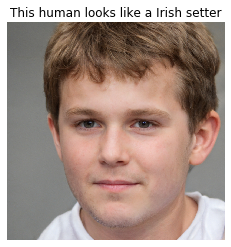

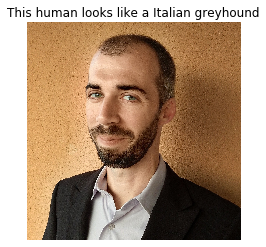

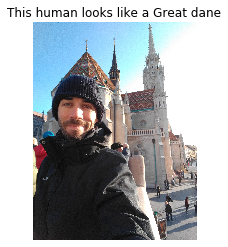

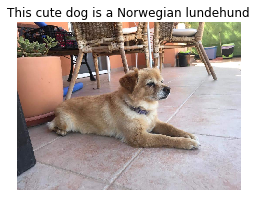

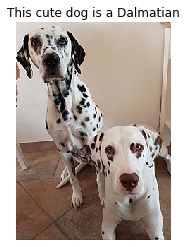

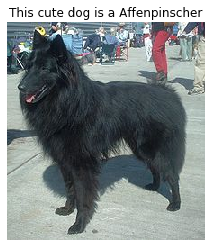

In [105]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

new_human_files = ['testimages/fakeGAN.jpg',
                  'testimages/pablo.jpg',
                  'testimages/pablo2.jpg']

new_dog_files = ['testimages/002.jpg',
                  'testimages/001.jpg',
                  'testimages/000.jpg']
## suggested code, below
for file in np.hstack((new_human_files[:3], new_dog_files[:3])):
    run_app(file)